In [1]:
# some imports

import matplotlib.pyplot as plt
import numpy as np
import network_hhw as nhw

In [2]:
import torch
import torchvision.transforms as transforms
import torchvision.datasets as datasets
from torch.autograd import Variable

In [3]:
from PIL import Image

In [4]:
# data_transform to normalize images

data_transform = nhw.data_transform

In [5]:
# function that returns the index of predicted letter

def predict_image(image):
    image_tensor = data_transform(image).float()
    image_tensor = image_tensor.unsqueeze_(0)
    input = Variable(image_tensor)
    input = input.to(device)
    output = model(input)
    index = output.data.cpu().numpy().argmax()
    return index

In [6]:
# gets the device, and load the model

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
PATH = './models/model004.pth'
model = nhw.Net()
model.load_state_dict(torch.load(PATH))

<All keys matched successfully>

In [21]:
# path to the image that you want to classify

root = 'hhw_dataset/TEST/shin/4.png'

In [22]:
# loads the image and get the answer

image = Image.open(root)
index = predict_image(image)

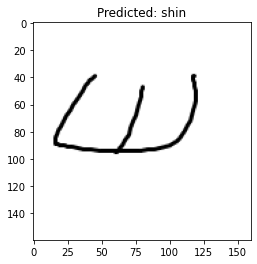

In [23]:
imgplot = plt.imshow(image)
plt.title(str("Predicted: " + nhw.classes[index]))
plt.show()